# Steps

### 1 - Gathering
### 2 - Assessing
### 3 - cleaning
### 4 - visualizations

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as  sns 
import os
import json
#from sqlalcmey import  create_engine
#from PIL import Image
from IPython.display import Image


# 1- Gathering Data

In [2]:
#load twitter archive enhanced file
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#download image prediction file 
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file :
    file.write(response.content)

In [4]:
df_pred=pd.read_csv('image-predictions.tsv', sep = '\t')

Getting Tweet data form Twittr API 

In [145]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

ModuleNotFoundError: No module named 'tweepy'

In [5]:
df_list=[]
with open ('tweet-json.txt')as file:
    for line in file :
        df_list.append(json.loads(line))

In [6]:
print(df_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [7]:
tweet_data = pd.DataFrame(df_list, columns=['id','retweet_count','favorite_count'])

In [8]:
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# 2- Assessing

### A- Assessing Enhanced Twitter Archive Data

In [9]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
df_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
517,810896069567610880,NaN,NaN,2016-12-19 17:14:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hunter. He just found out he needs bra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/810896069...,11,10,Hunter,None,None,None,None
1443,696744641916489729,NaN,NaN,2016-02-08 17:17:22 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Klevin. He doesn't want his family bra...,NaN,NaN,NaN,https://vine.co/v/i1wrljBUjAu,10,10,Klevin,None,None,None,None
1927,674051556661161984,NaN,NaN,2015-12-08 02:23:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She knits. Specializes in tobogg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674051556...,10,10,Lucy,None,None,None,None
275,840696689258311684,NaN,NaN,2017-03-11 22:51:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I didn't even have to intervene. Took him 4 mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/840696689...,10,10,None,None,None,None,None
2219,668496999348633600,NaN,NaN,2015-11-22 18:31:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jo. Jo is a Swedish Queso. Tongue bigg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668496999...,8,10,Jo,None,None,None,None
107,871762521631449091,NaN,NaN,2017-06-05 16:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rover. As part of pupper protocol he h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871762521...,12,10,Rover,None,None,pupper,None
2285,667188689915760640,NaN,NaN,2015-11-19 03:52:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Quite an advanced dog here. Impressively dress...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667188689...,10,10,None,None,None,None,None
856,764259802650378240,NaN,NaN,2016-08-13 00:38:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kota and her son Benedict. She doesn't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/764259802...,10,10,Kota,None,None,None,None
528,808501579447930884,NaN,NaN,2016-12-13 02:39:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He dug a hole and then sat in it...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808501579...,12,10,Koda,None,None,None,None
272,840761248237133825,NaN,NaN,2017-03-12 03:07:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Maddie and Gunner....,8.406323e+17,4.196984e+09,2017-03-11 18:35:42 +0000,"https://www.gofundme.com/3hgsuu0,https://twitt...",12,10,Maddie,None,None,None,None


In [11]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
df_archive[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [13]:
#check which rating number less than 10
df_archive[df_archive.rating_numerator<10].count()[0]

440

In [14]:
#check which ID have rating numerator less than 10
df_archive[df_archive.rating_numerator<10].tweet_id 

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 440, dtype: int64

In [15]:
#check rating numerator where ID = 883482846933004288
df_archive.loc[(df_archive.tweet_id==883482846933004288),'rating_numerator']

45    5
Name: rating_numerator, dtype: int64

In [16]:
#check text where ID = 883482846933004288 , rating numerator = 5
df_archive.loc[45 , 'text']

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [17]:
#check rating numerator where ID = 666033412701032449
df_archive.loc[(df_archive.tweet_id==666033412701032449),'rating_numerator']

2353    9
Name: rating_numerator, dtype: int64

In [18]:
#check text where ID = 883482846933004288 , rating numerator = 9
df_archive.loc[2353  , 'text']

'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR'

In [19]:
#check text where rating numerator <10
df_archive[df_archive.rating_numerator <10 ].loc[ 0:1000 , : ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
599,798682547630837760,NaN,NaN,2016-11-16 00:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here we see a rare pouched pupp...,6.769365e+17,4.196984e+09,2015-12-16 01:27:03 +0000,https://twitter.com/dog_rates/status/676936541...,8,10,None,None,None,pupper,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
745,780092040432480260,NaN,NaN,2016-09-25 17:10:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Hank. He's mischievous ...,7.533757e+17,4.196984e+09,2016-07-13 23:48:51 +0000,https://twitter.com/dog_rates/status/753375668...,8,10,Hank,None,None,None,None


In [20]:
df_archive[df_archive.rating_numerator <10 ].loc[ 1000:1500 , : ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
1029,745712589599014916,NaN,NaN,2016-06-22 20:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Percy. He fell asleep at the wheel. Ir...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745712589...,7,10,Percy,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,693590843962331137,NaN,NaN,2016-01-31 00:25:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Phil. He's big af. Currently destroying t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693590843...,3,10,Phil,None,None,pupper,None
1484,693231807727280129,NaN,NaN,2016-01-30 00:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Bodie. He's not proud of what he did, ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/693231807...,9,10,Bodie,None,None,None,None
1488,692919143163629568,NaN,NaN,2016-01-29 03:56:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please only send in dogs. Don't submit other t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692919143...,9,10,None,None,None,None,None
1497,692423280028966913,6.924173e+17,4.196984e+09,2016-01-27 19:05:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: just noticed this dog has some extra ...,NaN,NaN,NaN,NaN,9,10,None,None,None,None,None


In [21]:
df_archive[df_archive.rating_numerator <10 ].loc[ 1500: , : ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1503,692017291282812928,NaN,NaN,2016-01-26 16:12:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kingsley Wellensworth III. He owns 7 r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692017291...,9,10,Kingsley,None,None,None,None
1504,691820333922455552,NaN,NaN,2016-01-26 03:09:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brockly. He's an uber driver. Falls as...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691820333...,8,10,Brockly,None,None,None,None
1508,691483041324204033,NaN,NaN,2016-01-25 04:49:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When bae says they can't go out but you see th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691483041...,5,10,None,None,None,None,None
1520,690728923253055490,NaN,NaN,2016-01-23 02:53:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Vinscent. He was just questioned about...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690728923...,8,10,Vinscent,None,None,None,None
1527,690360449368465409,NaN,NaN,2016-01-22 02:28:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Stop sending in lobsters. This is the final wa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690360449...,9,10,the,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [22]:
#check which rating number not equal 10
df_archive[df_archive.rating_denominator!= 10].count()[0]

23

In [23]:
df_archive[df_archive.rating_denominator!= 10].tweet_id

313     835246439529840640
342     832088576586297345
433     820690176645140481
516     810984652412424192
784     775096608509886464
902     758467244762497024
1068    740373189193256964
1120    731156023742988288
1165    722974582966214656
1202    716439118184652801
1228    713900603437621249
1254    710658690886586372
1274    709198395643068416
1351    704054845121142784
1433    697463031882764288
1598    686035780142297088
1634    684225744407494656
1635    684222868335505415
1662    682962037429899265
1663    682808988178739200
1779    677716515794329600
1843    675853064436391936
2335    666287406224695296
Name: tweet_id, dtype: int64

In [24]:
##check text where rating denominator not equal 10
df_archive[df_archive.rating_denominator!= 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [25]:
df_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [26]:
#check names of Dogs
df_archive.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Shawwn       1
Maisey       1
Loomis       1
Bruno        1
Brudge       1
Name: name, Length: 957, dtype: int64

### B- Assessing The Tweet Image Prediction

In [27]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
df_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [29]:
df_pred.sample(12)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1214,743253157753532416,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1,malamute,0.442612,True,Siberian_husky,0.368137,True,Eskimo_dog,0.177822,True
746,687664829264453632,https://pbs.twimg.com/media/CYsTg1XUsAEPjxE.jpg,1,pug,0.957365,True,French_bulldog,0.038559,True,toy_poodle,0.000667,True
509,676101918813499392,https://pbs.twimg.com/media/CWH_FTgWIAAwOUy.jpg,1,Shih-Tzu,0.225848,True,Norfolk_terrier,0.186873,True,Irish_terrier,0.106987,True
132,668466899341221888,https://pbs.twimg.com/media/CUbfGbbWoAApZth.jpg,1,shopping_basket,0.398361,False,hamper,0.363222,False,bassinet,0.084173,False
1934,859851578198683649,https://pbs.twimg.com/media/C-7OcfyXsAAsqzU.jpg,4,Labrador_retriever,0.899086,True,golden_retriever,0.047091,True,kuvasz,0.023206,True
74,667393430834667520,https://pbs.twimg.com/media/CUMOyd3XIAAl13H.jpg,1,papillon,0.557009,True,Border_collie,0.271963,True,collie,0.073473,True
1413,771004394259247104,https://pbs.twimg.com/media/CrMmVqyWcAIDCHI.jpg,1,home_theater,0.414338,False,iPod,0.052741,False,pop_bottle,0.048821,False
146,668627278264475648,https://pbs.twimg.com/media/CUdw9thWsAA4mB9.jpg,1,French_bulldog,0.965403,True,pug,0.008604,True,Boston_bull,0.008004,True
421,674045139690631169,https://pbs.twimg.com/media/CVqwedgXIAEAT6A.jpg,1,robin,0.369661,False,rhinoceros_beetle,0.110607,False,European_fire_salamander,0.043178,False
1547,792773781206999040,https://pbs.twimg.com/media/CwB_i-zXEAEiP29.jpg,1,Yorkshire_terrier,0.912804,True,silky_terrier,0.067823,True,Australian_terrier,0.004451,True


In [30]:
df_pred.loc[1033,'jpg_url']

'https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg'

In [31]:
Image(url='https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg')

In [32]:
df_pred.loc[1505,'jpg_url']

'https://pbs.twimg.com/media/CuXSHNnWcAIWEwn.jpg'

In [33]:
Image(url='https://pbs.twimg.com/media/CuXSHNnWcAIWEwn.jpg')

In [34]:
df_pred.loc[810,'jpg_url']

'https://pbs.twimg.com/media/CZskaEIWIAUeTr5.jpg'

In [35]:
Image(url='https://pbs.twimg.com/media/CZskaEIWIAUeTr5.jpg')

In [36]:
df_pred.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [37]:
df_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### C.Assessing tweet Data from Twitter API 

In [38]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [39]:
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [40]:
tweet_data.sample(10)

,id,retweet_count,favorite_count
1626,684588130326986752,1592,4489
1379,700890391244103680,653,2437
1562,688116655151435777,888,3093
1360,703041949650034688,14198,28996
732,781308096455073793,2961,7973
353,831262627380748289,2350,13066
2197,668779399630725120,409,749
2344,666058600524156928,61,115
800,772581559778025472,1968,7192
729,781661882474196992,3129,11634


# Observations
*observations were made visually using Excel to view the data and Programmaticly using pandas functions.*

## Quality

<font color=##0080ff size=4>**df_arch (Twitter Archive Data)**</font> 

1. colunms `doggo`, `floofer`, `pupper`, `puppo` has None for missing value.
2. exctart correct `rating_numerator` from `text`
3. The `rating_numerator` column should of type `float`.
4. `rating_denominator` column has values less than 10 . 
5. Invalid `tweet_id` datatype (sholud be `str` not `int`).
6. `timestamp` column is str instead of datetime.
7. some dog names `name` are invalid (a, an, the)
8. text column has the link for the tweets and ratings , remove it.
9. we only want original dog ratings. So you need to remove retweets 

<font color=##0080ff size=4>**df_pred (Image Predictions)**</font> 

1.  Missing photos for some IDs.
2.  Underscores in `p1` , `p2` , `p3` , sholud be spaces.
3.  Some `p` names start with uppercase and other start with lowercase.
4.  Invalid `tweet_id` datatype (sholud be `str` not `int`).

<font color=##0080ff size=4>**tweet_data (Twitter API)**</font> 

1.  id column in df_api name different than the other 2 data sets

## Tidiness

1.  `doggo`, `floofer`, `pupper`, `puppo` columns sholud be one column  `dog_stage`.

2. `img_num` useless.

3.  `p1`,`p1_conf`,`p1_dog`,`p2`,`p2_conf`,`p2_dog`,`p3`,`p3_conf`and `p3_dog` columns are useless expect high prediction

4.   Merge all dataframe by `tweet_id` ( all data is related)

# 3- Cleaning Data 

### Create  Dataframs copy

In [41]:
clean_df_archive = df_archive.copy()
clean_df_pred =df_pred.copy()
clean_tweet_data =tweet_data.copy()

In [42]:
#check dataframe copies 
clean_df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [43]:
clean_df_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Cleaning Quality issues

### Define
 colunms doggo, floofer, pupper, puppo has None for missing value, replace them with np.nan

### Code

In [44]:
column_names_list = ['doggo', 'floofer', 'pupper', 'puppo']

for col_name in column_names_list:
    clean_df_archive[col_name]=clean_df_archive[col_name].replace('None',np.nan)

### Test

In [45]:
clean_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       97 no

### Define

exctart correct rating_numerator from tweet text and replace the incorrect values with it

In [46]:
clean_df_archive[clean_df_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['text','rating_numerator']]

C:\Users\ALANDALUS PC\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [47]:
correct_rate_numerator=clean_df_archive[clean_df_archive.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*(?=\/\d+))")
correct_rate_numerator

C:\Users\ALANDALUS PC\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,0
45,13.5
340,9.75
695,9.75
763,11.27
1689,9.5
1712,11.26


In [48]:
clean_df_archive.loc[correct_rate_numerator.index, 'rating_numerator'] =correct_rate_numerator.values

### Test

In [49]:
clean_df_archive.rating_numerator[45]

'13.5'

### Define 

The `rating_numerator` column should of type `float`by using `astype()`

### Code

In [50]:
clean_df_archive.rating_numerator =clean_df_archive.rating_numerator.astype('float')

### Test 

In [51]:
clean_df_archive['rating_numerator'].dtype

dtype('float64')

### Define 

 `rating_denominator` column has values less than 10, All must be 10 

### Code

In [52]:
clean_df_archive= clean_df_archive[clean_df_archive['rating_denominator']==10]

### Test 

In [53]:
clean_df_archive[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2333.000000,2333.0
mean,12.174038,10.0
std,40.978669,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,1776.000000,10.0


### Define

convert `tweet_id` datatype from `int` to `str` by using `astype`

### Code

In [54]:
clean_df_archive['tweet_id']=clean_df_archive['tweet_id'].astype('str')

### Test

In [55]:
clean_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2333 non-null   object 
 1   in_reply_to_status_id       73 non-null     float64
 2   in_reply_to_user_id         73 non-null     float64
 3   timestamp                   2333 non-null   object 
 4   source                      2333 non-null   object 
 5   text                        2333 non-null   object 
 6   retweeted_status_id         180 non-null    float64
 7   retweeted_status_user_id    180 non-null    float64
 8   retweeted_status_timestamp  180 non-null    object 
 9   expanded_urls               2278 non-null   object 
 10  rating_numerator            2333 non-null   float64
 11  rating_denominator          2333 non-null   int64  
 12  name                        2333 non-null   object 
 13  doggo                       97 no

### define

convert `timestamp` datatype from str to datetime by using `astype`

### Code

In [56]:
clean_df_archive.timestamp=pd.to_datetime(clean_df_archive.timestamp)

### Test

In [57]:
clean_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2333 non-null   object             
 1   in_reply_to_status_id       73 non-null     float64            
 2   in_reply_to_user_id         73 non-null     float64            
 3   timestamp                   2333 non-null   datetime64[ns, UTC]
 4   source                      2333 non-null   object             
 5   text                        2333 non-null   object             
 6   retweeted_status_id         180 non-null    float64            
 7   retweeted_status_user_id    180 non-null    float64            
 8   retweeted_status_timestamp  180 non-null    object             
 9   expanded_urls               2278 non-null   object             
 10  rating_numerator            2333 non-null   float64         

### Define

Replace invalid dog names `name` are  like (a, an, the) with np.name

### Code

In [58]:
clean_df_archive[~clean_df_archive.name.str.istitle()].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the', 'by',
       'officially', 'life', 'light', 'space', 'JD', 'DayZ'], dtype=object)

In [59]:
clean_df_archive.name.replace([ 'None','such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad',
       'an', 'very', 'just', 'my', 'his', 'actually', 'getting',
       'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the', 'by',
       'officially', 'life', 'light', 'space'],np.nan, inplace = True)

### Test

In [60]:
clean_df_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey',

### Define

Remove links and ratings from text column using RegEx.

### Code

In [61]:
clean_df_archive.text[3]

'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ'

In [62]:
clean_df_archive.text=clean_df_archive.text.str.extract('(.+(?=\s\d+/\d+\s))')

### Test

In [63]:
clean_df_archive.text.head(10)

0    This is Phineas. He's a mystical boy. Only eve...
1    This is Tilly. She's just checking pup on you....
2    This is Archie. He is a rare Norwegian Pouncin...
3      This is Darla. She commenced a snooze mid meal.
4    This is Franklin. He would like you to stop ca...
5    Here we have a majestic great white breaching ...
6    Meet Jax. He enjoys ice cream so much he gets ...
7    When you watch your owner call another dog a g...
8    This is Zoey. She doesn't want to be one of th...
9    This is Cassie. She is a college pup. Studying...
Name: text, dtype: object

### Define

Delete rows with missing for some IDs.

In [64]:
clean_df_pred=clean_df_pred[clean_df_pred.jpg_url.notnull()]

In [65]:
clean_df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 168.2+ KB


### Define 

replace all Underscores in p1 , p2 , p3 with spaces

### Code

In [66]:
clean_df_pred.p1=clean_df_pred.p1.str.replace('_',' ')
clean_df_pred.p2=clean_df_pred.p2.str.replace('_',' ')
clean_df_pred.p3=clean_df_pred.p3.str.replace('_',' ')

### Test

In [67]:
clean_df_pred.p1.head(3)

0    Welsh springer spaniel
1                   redbone
2           German shepherd
Name: p1, dtype: object

In [68]:
clean_df_pred.p2.head(3)

0                collie
1    miniature pinscher
2              malinois
Name: p2, dtype: object

In [69]:
clean_df_pred.p3.head(3)

0      Shetland sheepdog
1    Rhodesian ridgeback
2             bloodhound
Name: p3, dtype: object

### Define

Make all prediction names start with uppercase 

### Code

In [70]:
clean_df_pred.p1=clean_df_pred.p1.str.title()
clean_df_pred.p2=clean_df_pred.p2.str.title()
clean_df_pred.p3=clean_df_pred.p3.str.title()

### Test

In [71]:
clean_df_pred.p1.sample(10)

1559                     Basset
281                       Goose
585                  Eskimo Dog
1166                        Pug
24                     Malamute
28      Black-And-Tan Coonhound
381          Miniature Pinscher
1104         Labrador Retriever
1294                       Chow
1653            Norwich Terrier
Name: p1, dtype: object

In [72]:
clean_df_pred.p2.sample(10)

1698              Pembroke
125     Miniature Pinscher
1157     Computer Keyboard
212                   Tray
1366              Sea Lion
821             Neck Brace
517             Toy Poodle
890                Doormat
1955        French Bulldog
131               Ice Bear
Name: p2, dtype: object

In [73]:
clean_df_pred.p3.sample(10)

238     Labrador Retriever
53                  Coyote
1305                Tripod
1970               Printer
647                    Pot
1130              Shih-Tzu
786      Brabancon Griffon
480       Brittany Spaniel
1149             Chihuahua
1140                Coyote
Name: p3, dtype: object

### Define

#### Tidiness issue
`doggo`, `floofer`, `pupper`, `puppo` columns sholud be one column `dog_stage`

### Code

In [74]:
clean_df_archive['dog_stage']=clean_df_archive['text'].str.extract('(doggo|floofer|pupper|puppo)')
clean_df_archive = clean_df_archive.drop(columns=['doggo','floofer','pupper','puppo'])

In [75]:
clean_df_archive['dog_stage'] = clean_df_archive['dog_stage'].replace('',np.nan).astype('category')

### Test

In [76]:
clean_df_archive.dog_stage.value_counts()

pupper     159
doggo       80
puppo       23
floofer      3
Name: dog_stage, dtype: int64

In [77]:
clean_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2333 non-null   object             
 1   in_reply_to_status_id       73 non-null     float64            
 2   in_reply_to_user_id         73 non-null     float64            
 3   timestamp                   2333 non-null   datetime64[ns, UTC]
 4   source                      2333 non-null   object             
 5   text                        2214 non-null   object             
 6   retweeted_status_id         180 non-null    float64            
 7   retweeted_status_user_id    180 non-null    float64            
 8   retweeted_status_timestamp  180 non-null    object             
 9   expanded_urls               2278 non-null   object             
 10  rating_numerator            2333 non-null   float64         

### Define

`img_num` column is useless, Delete it 

### Code

In [78]:
clean_df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 168.2+ KB


In [79]:
clean_df_pred=clean_df_pred.drop(columns='img_num')

### Test

In [80]:
clean_df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   p1        2075 non-null   object 
 3   p1_conf   2075 non-null   float64
 4   p1_dog    2075 non-null   bool   
 5   p2        2075 non-null   object 
 6   p2_conf   2075 non-null   float64
 7   p2_dog    2075 non-null   bool   
 8   p3        2075 non-null   object 
 9   p3_conf   2075 non-null   float64
 10  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 152.0+ KB


### Define

`p1`,`p1_conf`,`p1_dog`,`p2`,`p2_conf`,`p2_dog`,`p3,p3_conf`and `p3_dog` columns are useless expect high prediction
, Create `Breed_of_dogs` and `confidence_of_pred` columns with highest confidence predictions

In [81]:
kind= []
confidence= []

for index, row in clean_df_pred.iterrows():
    if row['p1_dog'] and row['p1_conf']==max([row['p1_conf'],row['p2_conf'],row['p3_conf']]):
        kind.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] and row['p2_conf']==max([row['p1_conf'],row['p2_conf'],row['p3_conf']]):
        kind.append(row['p2'])
        confidence.append(row['p2_conf'])        
    elif row['p3_dog'] and row['p3_conf']==max([row['p1_conf'],row['p2_conf'],row['p3_conf']]):
        kind.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        kind.append(np.nan)
        confidence.append(np.nan)


In [82]:
clean_df_pred['kind']=kind
clean_df_pred['confidence']=confidence

In [83]:
#check adding k `kind` and  `confidence` columns to fd_pred
clean_df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   p1          2075 non-null   object 
 3   p1_conf     2075 non-null   float64
 4   p1_dog      2075 non-null   bool   
 5   p2          2075 non-null   object 
 6   p2_conf     2075 non-null   float64
 7   p2_dog      2075 non-null   bool   
 8   p3          2075 non-null   object 
 9   p3_conf     2075 non-null   float64
 10  p3_dog      2075 non-null   bool   
 11  kind        1532 non-null   object 
 12  confidence  1532 non-null   float64
dtypes: bool(3), float64(4), int64(1), object(5)
memory usage: 184.4+ KB


In [84]:
clean_df_pred.sample(5)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,kind,confidence
1541,791026214425268224,https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg,Malamute,0.375098,True,Jean,0.069362,False,Keeshond,0.050528,True,Malamute,0.375098
951,704871453724954624,https://pbs.twimg.com/media/Ccg02LiWEAAJHw1.jpg,Norfolk Terrier,0.689504,True,Soft-Coated Wheaten Terrier,0.101480,True,Norwich Terrier,0.055779,True,Norfolk Terrier,0.689504
353,672591271085670400,https://pbs.twimg.com/media/CVWGMQMWUAA7aOM.jpg,Gondola,0.134290,False,Lifeboat,0.108356,False,Bassinet,0.093679,False,NaN,NaN
123,668226093875376128,https://pbs.twimg.com/media/CUYEFlQXAAUkPGm.jpg,Trombone,0.390339,False,Cornet,0.314149,False,French Horn,0.255182,False,NaN,NaN
625,680798457301471234,https://pbs.twimg.com/media/CXKuiyHUEAAMAGa.jpg,Ram,0.499761,False,Hog,0.283795,False,Ox,0.067455,False,NaN,NaN


In [85]:
#Drop useless columns
clean_df_pred = clean_df_pred.drop(columns=['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf' ,'p3_dog' ])

### Test

In [86]:
clean_df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   kind        1532 non-null   object 
 3   confidence  1532 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 81.1+ KB


In [87]:
clean_df_pred.sample(10)

,tweet_id,jpg_url,kind,confidence
803,691483041324204033,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,Bloodhound,0.886232
88,667530908589760512,https://pbs.twimg.com/media/CUOL0uGUkAAx7yh.jpg,Golden Retriever,0.633037
325,671882082306625538,https://pbs.twimg.com/media/CVMBL_LWUAAsvrL.jpg,NaN,NaN
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,NaN,NaN
865,697463031882764288,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,Labrador Retriever,0.999885
207,669942763794931712,https://pbs.twimg.com/media/CUwdYL5UsAAP0XX.jpg,Vizsla,0.743216
585,678991772295516161,https://pbs.twimg.com/media/CWxDaXHWsAAWV8W.jpg,Eskimo Dog,0.330216
545,677314812125323265,https://pbs.twimg.com/media/CWZOOIUW4AAQrX_.jpg,Blenheim Spaniel,0.924127
859,696894894812565505,https://pbs.twimg.com/media/CaveNQcVIAECyBr.jpg,Appenzeller,0.665628
1803,832040443403784192,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,Miniature Pinscher,0.796313


### Define

convert tweet_id datatype from int to str by using astype

### Code

In [88]:
clean_df_pred['tweet_id']=clean_df_pred['tweet_id'].astype('str')

### Test

In [89]:
clean_df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   object 
 1   jpg_url     2075 non-null   object 
 2   kind        1532 non-null   object 
 3   confidence  1532 non-null   float64
dtypes: float64(1), object(3)
memory usage: 81.1+ KB


### Define

Rename `id` column in tweet_data to `tweet_id`

### Code

In [90]:
clean_tweet_data = clean_tweet_data.rename(columns={'id':'tweet_id'})

### Test

In [91]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Define

convert tweet_id datatype from int to str by using astype (tweet_data)

### Code

In [92]:
clean_tweet_data['tweet_id']=clean_tweet_data['tweet_id'].astype('str')

### Test 

In [93]:
clean_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Define

Merge all dataframe by tweet_id ( all data is related)

### code

In [94]:
clean_df_archive=pd.merge(clean_df_archive, clean_df_pred, on='tweet_id', how='left')
clean_df_archive=pd.merge(clean_df_archive, clean_tweet_data, on='tweet_id', how='left')

### Test

In [95]:
clean_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2332
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2333 non-null   object             
 1   in_reply_to_status_id       73 non-null     float64            
 2   in_reply_to_user_id         73 non-null     float64            
 3   timestamp                   2333 non-null   datetime64[ns, UTC]
 4   source                      2333 non-null   object             
 5   text                        2214 non-null   object             
 6   retweeted_status_id         180 non-null    float64            
 7   retweeted_status_user_id    180 non-null    float64            
 8   retweeted_status_timestamp  180 non-null    object             
 9   expanded_urls               2278 non-null   object             
 10  rating_numerator            2333 non-null   float64         

### Define
we only want original dog ratings. So you need to remove retweets 

### Code

In [96]:
clean_df_archive = clean_df_archive.query('in_reply_to_status_id == "NaN" &\
                                                     in_reply_to_user_id == "NaN" &\
                                                    retweeted_status_id == "NaN" &\
                                                    retweeted_status_user_id == "NaN"')

In [97]:
clean_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2332
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2080 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2080 non-null   datetime64[ns, UTC]
 4   source                      2080 non-null   object             
 5   text                        2012 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2077 non-null   object             
 10  rating_numerator            2080 non-null   float64         

In [98]:
cols = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp']
clean_df_archive.drop(columns = cols, axis=1, inplace=True)

### Test

In [99]:
clean_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2332
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2080 non-null   object             
 1   timestamp           2080 non-null   datetime64[ns, UTC]
 2   source              2080 non-null   object             
 3   text                2012 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2080 non-null   float64            
 6   rating_denominator  2080 non-null   int64              
 7   name                1385 non-null   object             
 8   dog_stage           237 non-null    category           
 9   jpg_url             1954 non-null   object             
 10  kind                1449 non-null   object             
 11  confidence          1449 non-null   float64            
 12  retweet_count       2080 non-null 

### Define

Remove all nul expanded url 

### Code

In [100]:
clean_df_archive= clean_df_archive.loc[~clean_df_archive.expanded_urls.isnull()]

### Test

In [101]:
clean_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2332
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2077 non-null   object             
 1   timestamp           2077 non-null   datetime64[ns, UTC]
 2   source              2077 non-null   object             
 3   text                2010 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2077 non-null   float64            
 6   rating_denominator  2077 non-null   int64              
 7   name                1385 non-null   object             
 8   dog_stage           237 non-null    category           
 9   jpg_url             1954 non-null   object             
 10  kind                1449 non-null   object             
 11  confidence          1449 non-null   float64            
 12  retweet_count       2077 non-null 

### Storing Data 

In [102]:
clean_df_archive.to_csv('twitter_archive_master.csv')

## 4- Visualization

In [103]:
df_stage= clean_df_archive.dog_stage.value_counts()

In [104]:
df_stage

pupper     146
doggo       70
puppo       18
floofer      3
Name: dog_stage, dtype: int64

Text(0.5, 1.0, '')

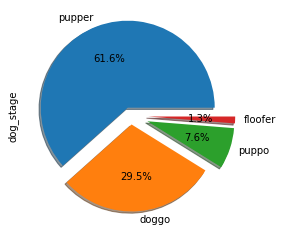

In [105]:
labels = 'pupper', 'doggo','puppo','floofer'
explode = (0.1, 0.1, 0.2, 0.2)

df_stage.plot.pie(subplots=True, figsize=(8, 4),explode=explode, autopct='%1.1f%%',
        shadow=True);
plt.title('')

### Insights

1.  Pupper has the highest percentage
2.  floofer has the lowest percentage

In [106]:
df_rating_numerator=clean_df_archive['rating_numerator'].value_counts()
df_rating_numerator

12.00      485
10.00      434
11.00      413
13.00      287
9.00       152
8.00        98
7.00        51
14.00       38
5.00        33
6.00        32
3.00        19
4.00        15
2.00         9
1.00         4
9.75         1
0.00         1
11.26        1
11.27        1
13.50        1
420.00       1
1776.00      1
Name: rating_numerator, dtype: int64

[Text(0.5, 0, 'Ratings'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Ratings frequency')]

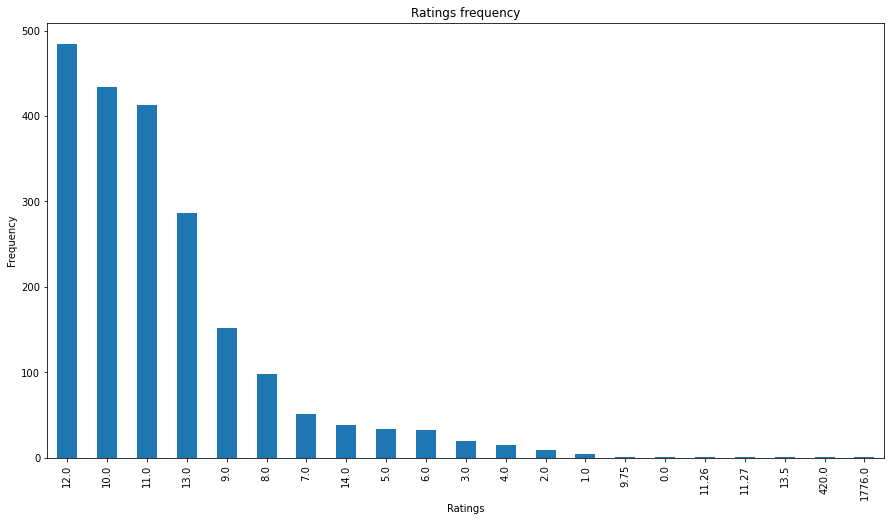

In [107]:
x = df_rating_numerator.index
y = df_rating_numerator.values

ax=df_rating_numerator.plot(x='x',y='y',kind='bar' ,figsize=(15,8))
sns.set_palette("Reds")
ax.set(xlabel='Ratings', ylabel='Frequency', title='Ratings frequency')

Take a look for very high rating (more than 300)

In [108]:
df_high_rating_numerator=clean_df_archive[clean_df_archive['rating_numerator']>300]
df_high_rating_numerator

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,kind,confidence,retweet_count,favorite_count
973,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af.,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,NaN,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,NaN,NaN,2772.0,5569.0
2052,670842764863651840,2015-11-29 05:52:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Good dogg.,https://twitter.com/dog_rates/status/670842764...,420.0,10,NaN,NaN,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,NaN,NaN,4324.0,7989.0


In [109]:
clean_df_archive.loc[973,'jpg_url']

'https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg'

In [110]:
Image(url='https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg')

In [111]:
clean_df_archive.loc[2052,'jpg_url']

'https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg'

In [112]:
Image(url='https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg')

In [113]:
clean_df_archive.drop(index=2052 , inplace= True)

In [114]:
df_high_rating_numerator=clean_df_archive[clean_df_archive['rating_numerator']>300]
df_high_rating_numerator

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,kind,confidence,retweet_count,favorite_count
973,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af.,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,NaN,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,NaN,NaN,2772.0,5569.0


In [115]:
clean_df_archive.head(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,kind,confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal.,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NaN,NaN,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,9774.0,41048.0
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,NaN,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake Bay Retriever,0.425595,3261.0,20562.0
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,2158.0,12041.0
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,NaN,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,16716.0,56848.0
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish Terrier,0.487574,4429.0,28226.0
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,7711.0,32467.0
